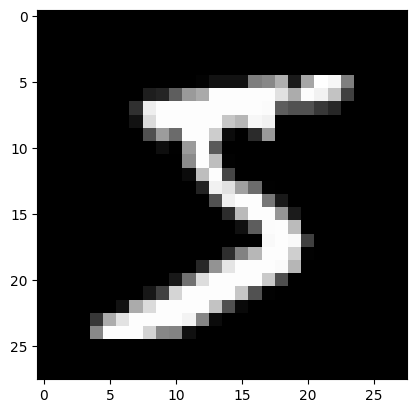

In [ ]:

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image


(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train.shape


X_test.shape


single_image= X_train[0]


single_image.shape


plt.imshow(single_image,cmap='gray')


y_train.shape


X_train.min()


X_train.max()


X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0


X_train_scaled.min()


X_train_scaled.max()


y_train[0]


y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
print("LOSHINI.G,REG NO:212223220051")
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=40,kernel_size=(3,3),strides=(1,1),activation='relu'))
model.add(layers.Conv2D(filters=80,kernel_size=(3,3),strides=(1,1),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(12,activation='relu'))
model.add(layers.Dense(14,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

LOSHINI.G,REG NO:212223220051
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 40)        400       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 80)        28880     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 80)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 11520)             0         
                                                                 
 dense (Dense)               (None, 12)                138252    
                                                                 
 dense_1 (Dense)             (None, 14)                182       
                          

In [ ]:
print("LOSHINI.G,REG NO:212223220051")
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train_onehot, epochs=5, batch_size=64,
          validation_data=(X_test_scaled, y_test_onehot))

LOSHINI.G,REG NO:212223220051
Epoch 1/5
938/938 [==============================] - 12s 8ms/step - loss: 0.3013 - accuracy: 0.9056 - val_loss: 0.0777 - val_accuracy: 0.9789
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0697 - accuracy: 0.9793 - val_loss: 0.0669 - val_accuracy: 0.9794
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0491 - accuracy: 0.9850 - val_loss: 0.0522 - val_accuracy: 0.9839
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0364 - accuracy: 0.9886 - val_loss: 0.0431 - val_accuracy: 0.9866
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0281 - accuracy: 0.9910 - val_loss: 0.0433 - val_accuracy: 0.9876


LOSHINI.G,REG NO:212223220051
313/313 [==============================] - 1s 2ms/step
[[ 973    0    2    0    0    0    3    0    1    1]
 [   0 1131    1    2    1    0    0    0    0    0]
 [   2    2 1001    1    6    0    1   15    4    0]
 [   0    0    1 1003    0    3    0    1    1    1]
 [   0    0    0    0  974    0    4    0    1    3]
 [   2    0    0    7    0  878    4    0    1    0]
 [   5    3    0    0    2    2  944    0    2    0]
 [   0    1    2    1    0    0    0 1020    1    3]
 [   2    0    2    1    1    0    2    3  961    2]
 [   0    2    0    0    9    3    0    3    1  991]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
     

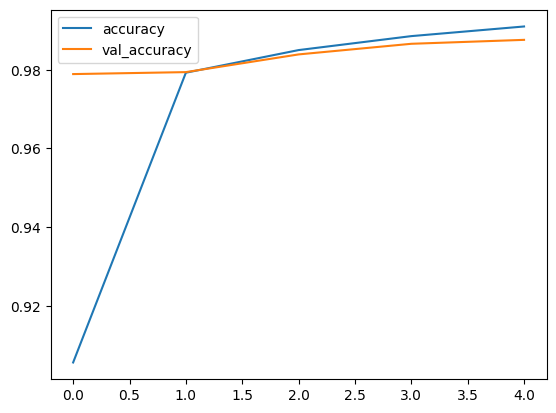

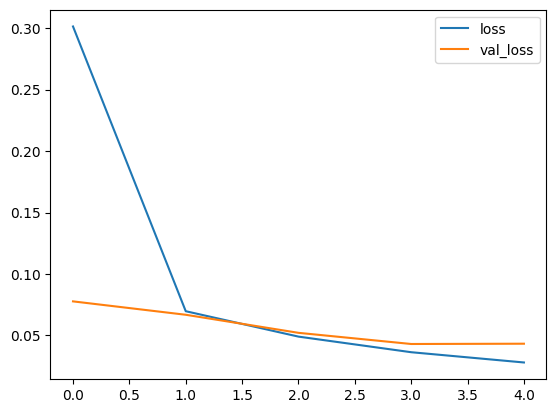

In [ ]:
print("LOSHINI.G,REG NO:212223220051")
metrics = pd.DataFrame(model.history.history)

metrics.head()

metrics[['accuracy', 'val_accuracy']].plot()

metrics[['loss', 'val_loss']].plot()

x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
print(confusion_matrix(y_test, x_test_predictions))
print(classification_report(y_test, x_test_predictions))

LOSHINI.G,REG NO:212223220051
1/1 [==============================] - 0s 113ms/step
[6]
1/1 [==============================] - 0s 17ms/step
[6]


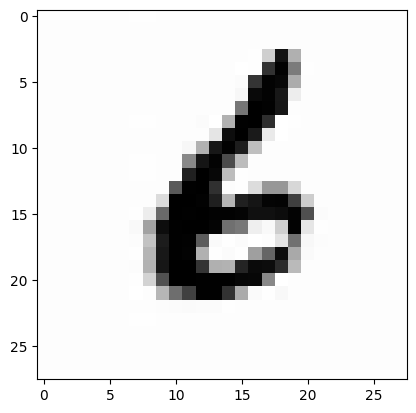

In [ ]:
print("LOSHINI.G,REG NO:212223220051")
img = image.load_img('/content/Screenshot 2024-03-20 135143.png')

type(img)

img = image.load_img('/content/Screenshot 2024-03-20 135143.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor, (28, 28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy() / 255.0

x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1, 28, 28, 1)),
    axis=1)

print(x_single_prediction)

plt.imshow(img_28_gray_scaled.reshape(28, 28), cmap='gray')
img_28_gray_inverted = 255.0 - img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy() / 255.0

x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1, 28, 28, 1)),
    axis=1)

print(x_single_prediction)